<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/GSoC-2021/blob/main/Image%20Segmentation/Unet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Unet model using PyTorch

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)

1.7.0+cu110


In [ ]:
class UNet(nn.Module):
    def __init__(self, n_filters, out_channel, kernel_size):
        super(UNet, self).__init__()
        self.__filters = n_filters
        self.relu = nn.ReLU()
        self.out_channel = out_channel
        self.kernel_size = kernel_size
    
    def forward(self, x):
        skips = []
        for i in range(len(self.__filters) - 2):
            out = nn.Conv2d(self.__filters[i], self.__filters[i + 1], self.kernel_size)(x)
            out = self.relu(out)
            print(out.shape)
            out = nn.Conv2d(self.__filters[i+1], self.__filters[i + 1], self.kernel_size)(out)
            out = self.relu(out)
            print(out.shape)
            skips.append(out)
            x = nn.MaxPool2d(2, 2)(out)
            
        print(len(skips))
        x = nn.Conv2d(self.__filters[i + 1], self.__filters[i + 2], self.kernel_size)(x)
        x = nn.Conv2d(self.__filters[i + 2], self.__filters[i + 2], self.kernel_size)(x)
        print(x.shape)
        filters = self.__filters[::-1][:-1]
        skips = skips[::-1]
        crop = [4, 16, 40, 88]
        for i in range(len(filters) - 1):
            out = nn.ConvTranspose2d(filters[i], filters[i + 1], (2, 2), stride = 2)(x)
            out = torch.cat([out, skips[i][:, :, crop[i]:-crop[i], crop[i]:-crop[i]]], dim = 1)
            print(out.shape)
            out = nn.Conv2d(filters[i], filters[i + 1], self.kernel_size)(out)
            out = self.relu(out)
            out = nn.Conv2d(filters[i + 1], filters[i + 1], self.kernel_size)(out)
            x = self.relu(out)
            
        x = nn.Conv2d(filters[i + 1], self.out_channel, self.kernel_size)(x)
        return x
        
        
            
        
        
n_filters = [3, 64, 128, 256, 512, 1024]

In [ ]:
unet = UNet(n_filters, 1, 3)

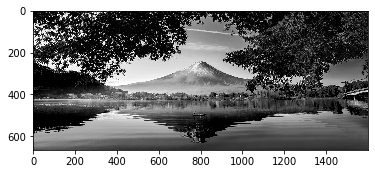

In [ ]:
img = plt.imread('test3.jpg') / 255.
plt.imshow(img)

In [ ]:
img.resize([572, 572, 3])

In [ ]:
img.shape

(572, 572, 3)

In [ ]:
image = img[np.newaxis, ...]
image.shape

(1, 572, 572, 3)

In [ ]:
image = image.astype(np.double)

In [ ]:
image.dtype

dtype('float64')

In [ ]:
img = torch.from_numpy(np.transpose(image, (0, 3, 1, 2))).float()
img.shape

torch.Size([1, 3, 572, 572])

In [ ]:
unet(img)

torch.Size([1, 64, 570, 570])
torch.Size([1, 64, 568, 568])
torch.Size([1, 128, 282, 282])
torch.Size([1, 128, 280, 280])
torch.Size([1, 256, 138, 138])
torch.Size([1, 256, 136, 136])
torch.Size([1, 512, 66, 66])
torch.Size([1, 512, 64, 64])
4
torch.Size([1, 1024, 28, 28])
torch.Size([1, 1024, 56, 56])
torch.Size([1, 512, 104, 104])
torch.Size([1, 256, 200, 200])
torch.Size([1, 128, 392, 392])


tensor([[[[-0.0160, -0.0144, -0.0162,  ..., -0.0176, -0.0178, -0.0182],
          [-0.0142, -0.0165, -0.0172,  ..., -0.0146, -0.0141, -0.0140],
          [-0.0153, -0.0170, -0.0169,  ..., -0.0152, -0.0145, -0.0178],
          ...,
          [-0.0132, -0.0122, -0.0118,  ..., -0.0098, -0.0108, -0.0100],
          [-0.0123, -0.0128, -0.0127,  ..., -0.0178, -0.0161, -0.0172],
          [-0.0175, -0.0170, -0.0170,  ..., -0.0101, -0.0109, -0.0115]]]],
       grad_fn=<MkldnnConvolutionBackward>)